# Лабораторная работа по теме "NN для бинарной классификации"
## Выполнила: Залесская Галина

Прежде всего, спасибо за эту лабораторную. Еще не было такого, чтобы я без какого-либо чувства вины могла часами залипать в картинки котиков с благонамеренным поводом о сборе датасета. И в целом эта лабораторная здорово заинтересовала.

Я обучала модель, определяющую наличие или отсутствие котика на картинке. С такой задачей я еще не сталкивалась, и она, очевидно, отличается от классификации котики против собачек.

In [8]:
import numpy as np
import keras.preprocessing.image as Image
import matplotlib.pyplot as plt

In [9]:
from keras.layers import *
from keras.activations import *
from keras.losses import *
from keras.metrics import *
from keras.optimizers import *
from keras.models import *

In [10]:
batch_size = 64
shape = (224, 224, 3)
path = '/kaggle/input/cats-vs-notcats/Best_dataset/'

В лучшем в мире датасете 300 картинок котиков, взятых в основном отсюда (https://www.kaggle.com/ppleskov/cute-cats-and-dogs-from-pixabaycom#000ee0d4e7b68db059f48d9f98611a8a.jpg). Этот датасет должен разделять милых и не милых котиков, что в корне неправильно, так как поди найди немилых котиков.

Часть с некотиками - разнообразная солянка из 300 фотографий машин, самолетов, других животных (собачки, коровы, овечки, курицы, лошади, слоны, насекомые), фруктов, пластика, картин и даже еды.  
Потому что нам всем нужно раз и навсегда уяснить, что котики - это не еда! 

Ссылка на датасет - https://www.kaggle.com/kotik13/cats-vs-notcats.

In [11]:
datagen = Image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range = 20,
        horizontal_flip=True,
        featurewise_center=True,
        featurewise_std_normalization=True,
        validation_split=0.2)

train_generator = datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary',
        subset='training')
    
validation_generator = datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary',
        subset='validation')

Found 481 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [12]:
def encode(a):
    if a == 0:
        return "Котик"
    else:
        return "Не котик"

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


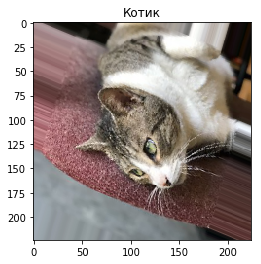

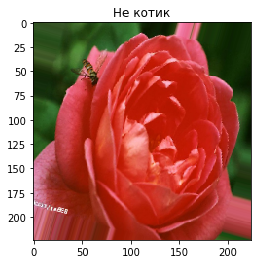

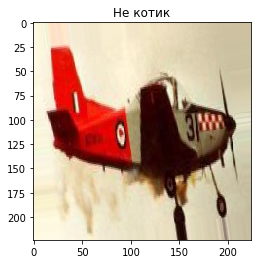

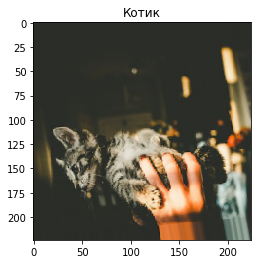

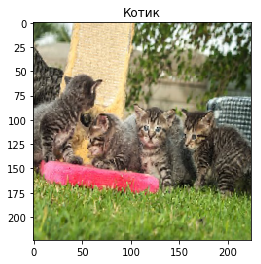

In [13]:
x,y = train_generator.next()
for i in range(5):
    plt.imshow(x[i])
    plt.title(encode(y[i]))
    plt.show()

Вот так выглядят наши данные.


Для тренировки возьмем простую и легкую модель, собранную еще на занятиях, чтобы понять, что к чему.

In [14]:
inp = Input(shape=shape)
conv1 = Conv2D(filters=64, kernel_size = (3,3), strides = 1, padding = "same", data_format = 'channels_last')(inp)
conv1 = Activation('relu')(conv1)
pool1 = MaxPool2D(2)(conv1) 
pool1 = Dropout(0.5)(pool1)

conv2 = Conv2D(filters=64, kernel_size = (3,3), strides = 1, padding = "same")(pool1)
conv2 = Activation('relu')(conv2)
pool2 = MaxPool2D(2)(conv2)

flat = Flatten()(pool2)
dense = Dense(256, activation='softmax')(flat)
dense = Activation('relu')(dense)
out = Dense(1, activation='softmax')(dense)

model_draft = Model(inputs=inp, outputs = out)

model_draft.compile(RMSprop(lr = 0.01),
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

In [15]:
%%time
history_draft = model_draft.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs=50, verbose=2)


Epoch 1/50


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 - 9s - loss: 7.6324 - binary_accuracy: 0.5022 - val_loss: 7.4270 - val_binary_accuracy: 0.5156
Epoch 2/50
 - 6s - loss: 7.6870 - binary_accuracy: 0.4922 - val_loss: 7.8060 - val_binary_accuracy: 0.4909
Epoch 3/50
 - 7s - loss: 7.8035 - binary_accuracy: 0.4911 - val_loss: 6.7083 - val_binary_accuracy: 0.5625
Epoch 4/50
 - 5s - loss: 7.5541 - binary_accuracy: 0.5000 - val_loss: 8.6424 - val_binary_accuracy: 0.4364
Epoch 5/50
 - 7s - loss: 7.2217 - binary_accuracy: 0.5290 - val_loss: 8.6249 - val_binary_accuracy: 0.4375
Epoch 6/50
 - 6s - loss: 7.6915 - binary_accuracy: 0.5012 - val_loss: 6.4121 - val_binary_accuracy: 0.5818
Epoch 7/50
 - 7s - loss: 7.7517 - binary_accuracy: 0.4892 - val_loss: 7.6666 - val_binary_accuracy: 0.5000
Epoch 8/50
 - 6s - loss: 7.7759 - binary_accuracy: 0.5012 - val_loss: 7.5272 - val_binary_accuracy: 0.5091
Epoch 9/50
 - 7s - loss: 7.7542 - binary_accuracy: 0.4988 - val_loss: 7.6666 - val_binary_accuracy: 0.5000
Epoch 10/50
 - 6s - loss: 7.6225 - binary_accura

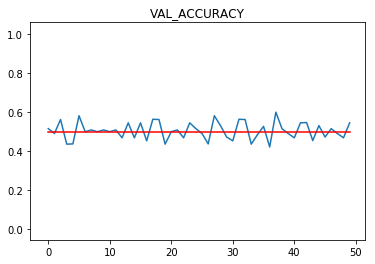

In [20]:
plt.plot(history_draft.history['val_binary_accuracy'])
plt.scatter(0,0, c='white')
plt.scatter(1,1, c='white')
plt.plot([0.5]*len(history_draft.history['val_binary_accuracy']), c='red')
plt.title('VAL_ACCURACY')
plt.show()

Точность дико скачет в районе случайного угадывания и движется не монотонно. Почему - не могу понять. Такое поведение может дать слишком большой LR, но его уменьшение ничего не меняет. Поведение отвратное.

Тренировка на 50 эпох прошла за 7 минут.

Возьмем маленькую, но качественную модель MobileNetV2 (14 MB) и добавим сверху три полносвязных слоя.

In [17]:
from keras.applications.mobilenet_v2 import MobileNetV2

input_tensor = Input(shape=(224, 224, 3))  
base_model = MobileNetV2(include_top = False, weights=None, input_tensor=input_tensor)
base_model.load_weights('/kaggle/input/mobilenet-v2-keras-weights/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5')

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

predictions = Dense(1, activation='softmax')(x)
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

model_mobilenet.compile(RMSprop(lr = 0.01),
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

In [18]:
%%time
history_mobilenet = model_mobilenet.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs=50, verbose=2)

Epoch 1/50


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 - 40s - loss: 7.6666 - binary_accuracy: 0.5000 - val_loss: 8.3854 - val_binary_accuracy: 0.4531
Epoch 2/50
 - 6s - loss: 7.7364 - binary_accuracy: 0.4948 - val_loss: 6.6909 - val_binary_accuracy: 0.5636
Epoch 3/50
 - 7s - loss: 7.5163 - binary_accuracy: 0.5036 - val_loss: 6.4687 - val_binary_accuracy: 0.5781
Epoch 4/50
 - 7s - loss: 7.9404 - binary_accuracy: 0.4821 - val_loss: 8.9212 - val_binary_accuracy: 0.4182
Epoch 5/50
 - 7s - loss: 6.7628 - binary_accuracy: 0.5540 - val_loss: 7.4270 - val_binary_accuracy: 0.5156
Epoch 6/50
 - 7s - loss: 8.2571 - binary_accuracy: 0.4580 - val_loss: 7.8060 - val_binary_accuracy: 0.4909
Epoch 7/50
 - 7s - loss: 7.3807 - binary_accuracy: 0.5228 - val_loss: 6.7083 - val_binary_accuracy: 0.5625
Epoch 8/50
 - 7s - loss: 7.5982 - binary_accuracy: 0.4940 - val_loss: 8.6424 - val_binary_accuracy: 0.4364
Epoch 9/50
 - 7s - loss: 7.5381 - binary_accuracy: 0.5060 - val_loss: 7.6666 - val_binary_accuracy: 0.5000
Epoch 10/50
 - 6s - loss: 7.5099 - binary_accur

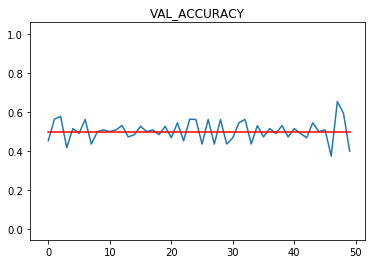

In [19]:
plt.plot(history_mobilenet.history['val_binary_accuracy'])
plt.scatter(0,0, c='white')
plt.scatter(1,1, c='white')
plt.plot([0.5]*len(history_mobilenet.history['val_binary_accuracy']), c='red')
plt.title('VAL_ACCURACY')
plt.show()

Поведение точно такое же. Точность так же случайная и более сложная модель нас не спасла. Тренировка на MobileNetV2 (50 эпох) прошла за 11.5 минут.

Но давайте возьмем еще более сложный InceptionV3 (92 MB, в 6 раз тяжелее предыдущей модели) и так же добавим три лишних полносвязных слоя.

In [ ]:
from keras.applications.inception_v3 import InceptionV3

input_tensor = Input(shape=(224, 224, 3))  
base_model = InceptionV3(include_top = False, weights=None, input_tensor=input_tensor)
base_model.load_weights('/kaggle/input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

predictions = Dense(1, activation='softmax')(x)
model_inception = Model(inputs=base_model.input, outputs=predictions)

model_inception.compile(RMSprop(lr = 0.01),
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

In [ ]:
%%time
history_inception = model_inception.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs=50, verbose=2)

In [ ]:
plt.plot(history_inception.history['val_binary_accuracy'])
plt.scatter(0,0, c='white')
plt.scatter(1,1, c='white')
plt.plot([0.5]*len(history_inception.history['val_binary_accuracy']), c='red')
plt.title('VAL_ACCURACY')
plt.show()

И с InceptionV3 картина та же.

На этих картинках я планировала проверять точность предсказывания, но лучше оставлю их здесь для моральной поддержки. Полежим, погрустим...

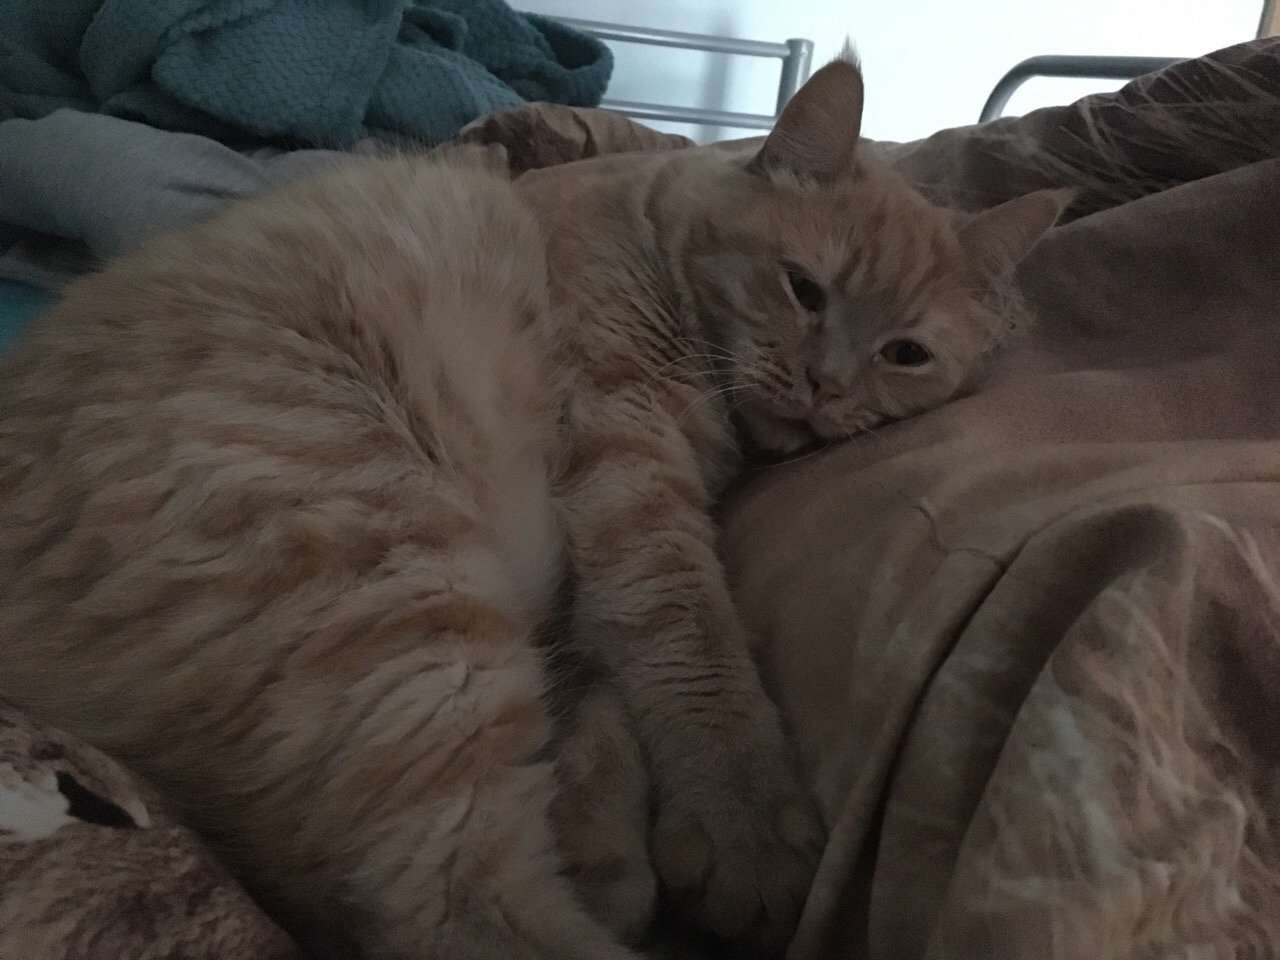

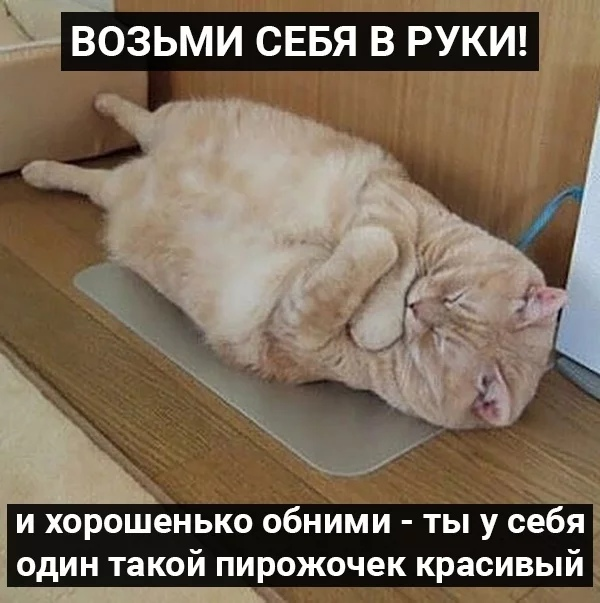

Как итог, я поработала с необычной для себя задачи классификации, поработала с датасетом и аугментацией (все свое, домашнее, а не всякие ваши полуфабрикаты), натренировала 3 модели (кастомную, MobileNetV2, InceptionV3) и получила случайную точность)))

Если ты дочитал до сюда, то почему бы не поставить лайк и 10 за лабу?